In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

from api_keys import g_key


In [2]:
file = "data_cleaning.csv"
df = pd.read_csv(file)
df['% Unemployed'] = df['No work >yr'] + df['No work< yr']
df = df.dropna(subset=['GeoLocation'])


In [3]:

df['GeoLocation'] = df['GeoLocation'].str.replace(r'\(*\)*','')
df[['lat','lng']] = df['GeoLocation'].str.split(', ',expand=True)


locations = df[['lat','lng']].astype(float)


<ipython-input-3-4e6829c58327>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['GeoLocation'] = df['GeoLocation'].str.replace(r'\(*\)*','')


In [4]:
gmaps.configure(api_key=g_key)
unemployment = df['% Unemployed']
poor_mh = df['14+ days when mental health not good']

fig = gmaps.figure()

heatmap_layer = gmaps.heatmap_layer(locations,weights=unemployment,dissipating=False, max_intensity=max(unemployment), point_radius=2)

fig.add_layer(heatmap_layer)

fig


Figure(layout=FigureLayout(height='420px'))

In [5]:
fig = gmaps.figure()

heatmap_layer = gmaps.heatmap_layer(locations,weights=poor_mh,dissipating=False, max_intensity=max(poor_mh), point_radius=2)

fig.add_layer(heatmap_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [6]:
rankings = pd.read_csv("MHA\Mental_Healthcare_Access_Tables.csv")

rankings.head()

,RankSort descending,State
0,1,Hawaii
1,2,Iowa
2,3,Minnesota
3,4,New York
4,5,Maryland


In [7]:
rankings.rename(columns = {"RankSort descending": "Rank", "State": "State"}, inplace = True)

In [8]:
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    51 non-null     int64 
 1   State   51 non-null     object
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [9]:
df = pd.merge(df, rankings, on = "State", how = "outer")

In [10]:
df.columns


Index(['Unnamed: 0', 'State', '$15,000 - 24,999', '$25,000 - 34,999',
       '$35,000 -  49,999', '$50,000+',
       '1-13 days when mental health not good',
       '1-13 days when physical health not good',
       '14+ days when mental health not good',
       '14+ days when physical health not good', '18-24 years', '25-34 years',
       '35-44 years', '45-54 years', '55-64 years', '65+ years',
       'American Indian or Alaskan native, non-Hispanic',
       'Asian, non-Hispanic', 'Black, non-Hispanic', 'College+', 'Divorced',
       'Employed', 'Female', 'H.S. or G.E.D.', 'Hispanic', 'Homemaker',
       'Less than $15,000', 'Less than H.S.', 'Male', 'Married',
       'Multiracial, non-Hispanic',
       'Native Hawaiian or other Pacific Islander, non-Hispanic',
       'Never married', 'No Depression Diagnosis', 'No work >yr',
       'No work< yr', 'Other race, non-Hispanic', 'Partnered', 'Retired',
       'Self-employed', 'Separated', 'Some post-H.S.', 'Student',
       'Unable to wor

In [11]:
df.dropna(subset=["Rank", "lat", "lng"], inplace = True)
rank = df["Rank"]
locations = df[['lat','lng']].astype(float)

fig = gmaps.figure()

heatmap_layer = gmaps.heatmap_layer(locations,weights=rank,dissipating=False, max_intensity=max(rank), point_radius=2)

fig.add_layer(heatmap_layer)

fig

Figure(layout=FigureLayout(height='420px'))

0.04186390717304186


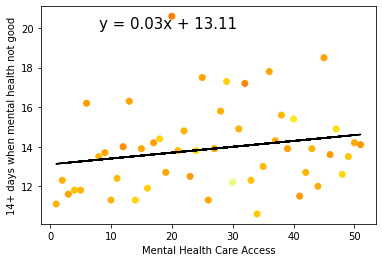

In [13]:
import scipy.stats as st
from scipy.stats import linregress

x=df['Rank'].astype(float)
y=df['14+ days when mental health not good'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rsqd = rvalue**2
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, c=df['Depression Diagnosis'],cmap='Wistia')
plt.plot(x,regress_values,"black")
plt.annotate(line_eq,(8,20),fontsize=15,color="black")
plt.xlabel('Mental Health Care Access')
plt.ylabel('14+ days when mental health not good')
print(rsqd)
plt.show()